<a href="https://colab.research.google.com/github/ChintPatel/CMPE258-HW2/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
import datetime


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


None

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 442040811520.0000 - mae: 614526.7500 - val_loss: 448856719360.0000 - val_mae: 619998.3750
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 448654180352.0000 - mae: 619037.6875 - val_loss: 448843087872.0000 - val_mae: 619987.7500
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 450935717888.0000 - mae: 619394.9375 - val_loss: 448793280512.0000 - val_mae: 619950.1875
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 471320231936.0000 - mae: 638702.0625 - val_loss: 448651198464.0000 - val_mae: 619845.4375
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 454978633728.0000 - mae: 624683.2500 - val_loss: 448317030400.0000 - val_mae: 619603.4375
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 443528740864.0000 - mae: 614700.8750 - val_loss: 447641485312.0000 - val_mae: 619121.0000
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 445013557248.0000 - mae: 616450.1875 - val_loss: 44641

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Mean Absolute Error: 33233.010130432594
Mean Squared Error: 1903868333.9350004
R-squared Score: 0.9704638211101293


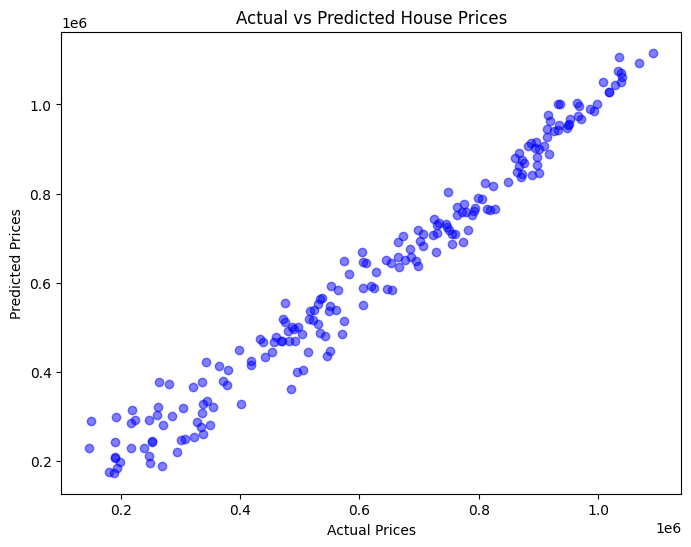

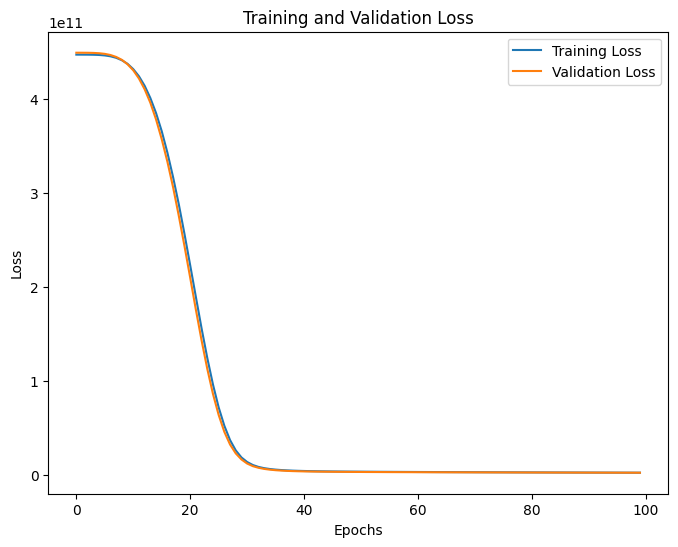

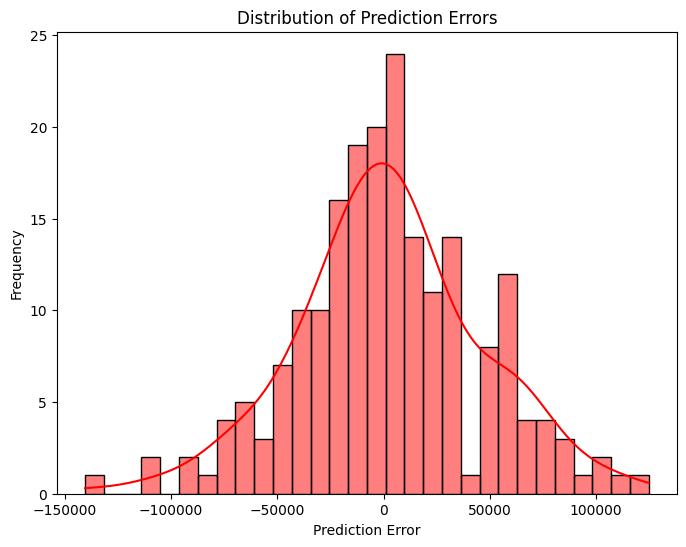

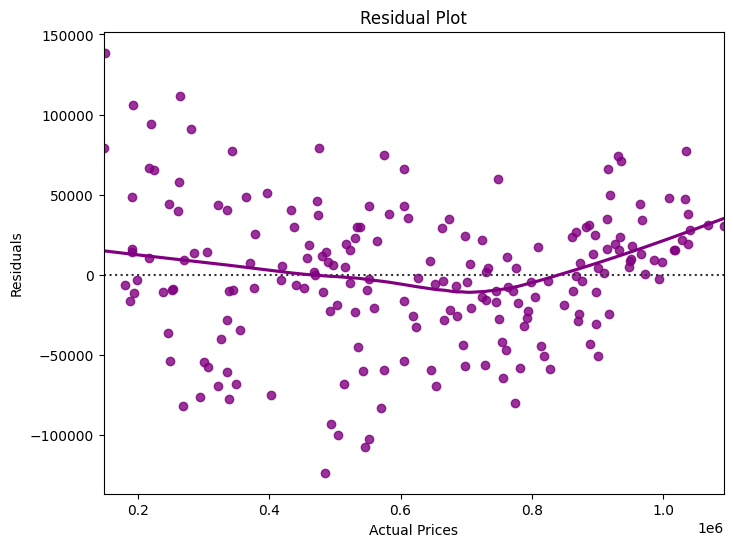

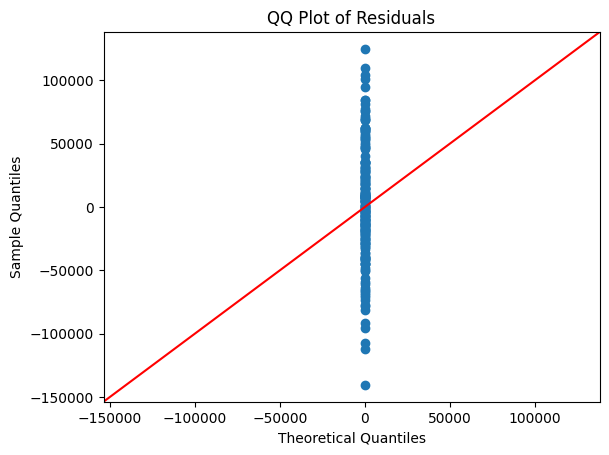

ExactExplainer explainer: 201it [00:16, 11.62it/s]                         


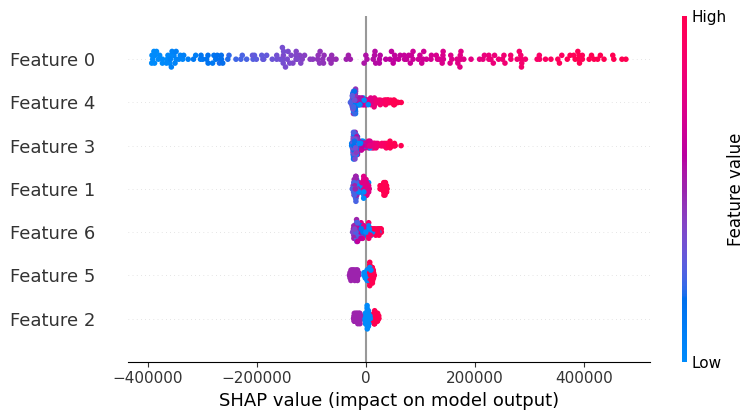

Regression Model Completed & Saved.


In [9]:

# Load dataset
df = pd.read_csv('/content/house-price-dataset.csv')

# Display dataset information
display(df.head())
display(df.info())

# Define features and target
X = df.drop(columns=['House_Price'])  # Corrected target variable
y = df['House_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Setup TensorBoard logging
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Build deep learning model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single neuron for regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model with TensorBoard logging
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test),
                    callbacks=[tensorboard_callback])

# Evaluate model
y_pred = model.predict(X_test).flatten()

# Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Plot Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Plot Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Error Distribution Plot
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True, color='red')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, color='purple')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# QQ Plot
sm.qqplot(errors, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

# SHAP Feature Importance Analysis
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

# Save model
model.save('house_price_regression_model.h5')
print("Regression Model Completed & Saved.")
